# Informações iniciais sobre as Features e link do dataset

Link do Dataset: https://www.kaggle.com/datasets/adilshamim8/credit-risk-benchmark-dataset



*About this file*

**rev_util**: Razão de uso de crédito por crédito disponível
Revolving Utilization of Unsecured Lines – The ratio of the total balance on revolving credit lines (e.g., credit cards) to the total credit limit on those accounts. This metric indicates how much of their available credit a borrower is using.

**age**:
The borrower's age in years.

**late_30_59**:
Number of Times 30-59 Days Past Due – The number of times the borrower has been 30 to 59 days late on a payment but not worse. This helps assess short-term delinquency behavior.

**debt_ratio**:
Debt Ratio – The proportion of monthly debt payments (including loans, alimony, etc.) to monthly gross income. It reflects the borrower's overall debt burden.

**monthly_inc**:
Monthly Income – The gross monthly income of the borrower.

**open_credit**:
Number of Open Credit Lines and Loans – The total number of open loans (installment loans) and revolving credit lines (e.g., credit cards) the borrower has.

**late_90**:
Number of Times 90 Days Late – The number of times the borrower has been 90 days or more late on a payment. This indicates severe delinquency issues.

**real_estate # de Hipotecas**:
Number of Real Estate Loans or Lines – The number of mortgage or real estate-related loans the borrower has, including home equity lines of credit.

**late_60_89**:
Number of Times 60-89 Days Past Due – The number of times the borrower has been 60 to 89 days late on a payment but not worse. This helps assess mid-term delinquency behavior.

**dependents**:
Number of Dependents – The number of individuals who rely on the borrower for financial support, excluding themselves (e.g., children, spouse).

**dlq_2yrs**:
Serious Delinquency in 2 Years – The target variable indicating whether the borrower experienced a serious delinquency (90 days or more past due) within the next two years. A value of 1 indicates a delinquency; 0 indicates none.




# Imports

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import joblib
import plotly 
import plotly.express as px  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Visualização dos Dados

In [2]:
path = 'Credit Risk Benchmark Dataset.csv'
dados_risk = pd.read_csv(path, encoding = 'utf-8')
x = dados_risk.iloc[:, :-1]
y = dados_risk.iloc[:, -1] #Target

In [3]:
display(dados_risk)

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16709,1.000000,46.0,0.0,170.398010,401.0,3.0,2.0,0.0,0.0,2.0,1
16710,1.135552,41.0,2.0,0.845887,7500.0,12.0,0.0,4.0,1.0,0.0,1
16711,0.920107,31.0,1.0,0.176732,1125.0,4.0,1.0,0.0,0.0,0.0,1
16712,0.983825,55.0,0.0,0.064116,4600.0,2.0,1.0,0.0,0.0,6.0,1


In [80]:
for column in dados_risk.columns:
    print(column, dados_risk[column].isna().sum())

dados_risk.info()
print(dados_risk.describe())
dados_risk[dados_risk.columns[-1]].sum(0)

rev_util 0
age 0
late_30_59 0
debt_ratio 0
monthly_inc 0
open_credit 0
late_90 0
real_estate 0
late_60_89 0
dependents 0
dlq_2yrs 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB
           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
me

8357

In [125]:
#Especificações gráficas
plt.rc("font", family = "sans-serif", weight = "light", size = 9);
plt.rc("lines", lw = 1, color = "r");
plt.rc("axes", edgecolor = "black");
plt.rcParams["axes.spines.top"] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'sans-serif']

Verificando possíveis correlações entre as features e o valor alvo

Espera-se que tem teve muitos atrasos anteriormente corra mais risco de não pagar, por exemplo.
O que pode verificar de fato pelos gráficos abaixo é que a média de idade do grupo de quem não pagou é menor em comparação ao grupo que pagou. Mas essa feature também possui alta variabilidade. Isso pode ser entendido devido à maior segurança financeira que pessoas mais velhas possuem.

Uma assimetria significativa no gráficos de dependentes mostra um grande número de dependentes pode ser um indicativo de discriminação de grupos não pagantes.

Nos gráficos abaixo, foram tirados outliers, por exemplo quem ganha acima de 50000 dólares ao mês. De modo geral, esses outliers não são tão interessantes.


In [59]:
no_outliers = dados_risk.copy()
no_outliers['late_90'] = no_outliers['late_90'].loc[ no_outliers['late_90']< 20]
no_outliers['late_60_89'] = no_outliers['late_60_89'].loc[no_outliers['late_60_89']< 20]
no_outliers['late_30_59'] = no_outliers['late_30_59'].loc[no_outliers['late_30_59']< 20]
no_outliers['monthly_inc'] = no_outliers['monthly_inc'].loc[no_outliers['monthly_inc']< 10000]
no_outliers['rev_util'] = no_outliers['rev_util'].loc[no_outliers['rev_util'] < 10]
no_outliers['debt_ratio'] = no_outliers['debt_ratio'].loc[no_outliers['debt_ratio']< 4]

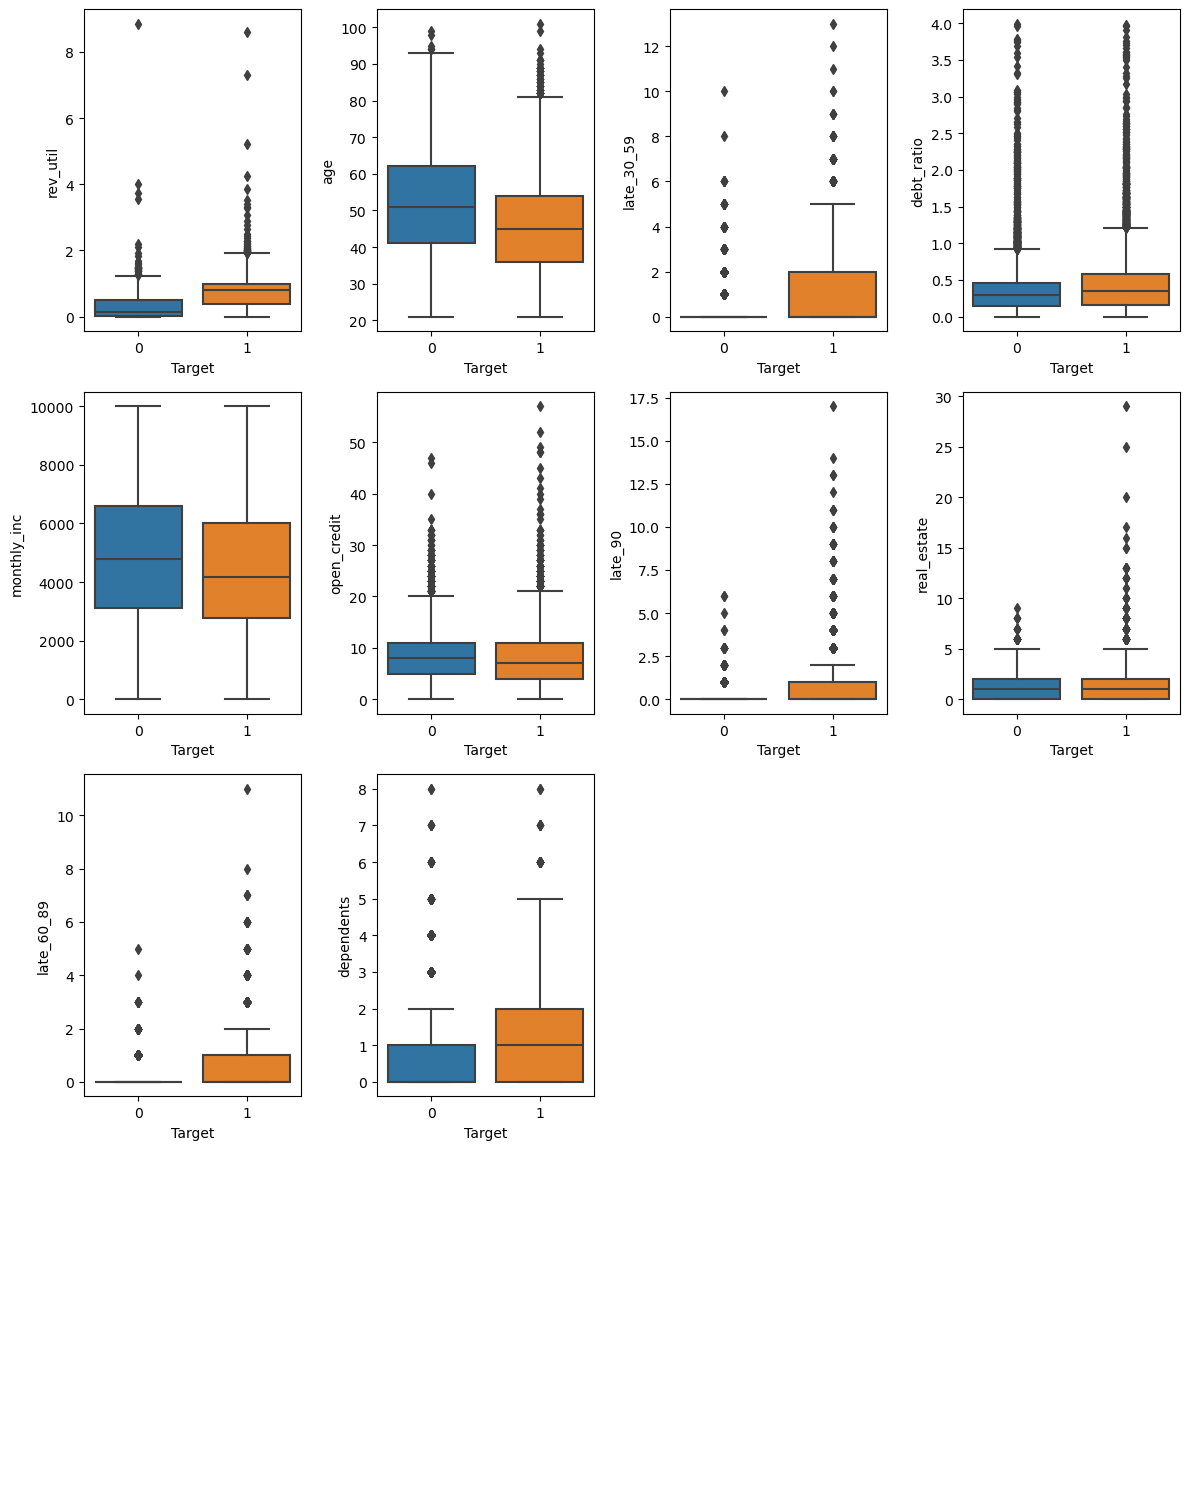

In [60]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 15))

nrows, ncols = 4, 4
for row in range(nrows):
    for col in range(ncols):
        i = row * ncols + col   # índice da feature
        if i < len(x.columns):  
            feature = x.columns[i]
            sns.boxplot(y=feature, x='dlq_2yrs', data=no_outliers, ax = ax[row, col])
            ax[row, col].set_xlabel("Target")
        else:
            ax[row, col].axis("off")  # desliga subplot vazio

plt.tight_layout()
plt.show()

Uma correlação clara, também esperada, pode ser vista nos box referentes às quantidades de atrasos. Em média, quem recebe mais tende a atrasar menos.


# Verificando a distribuição das features

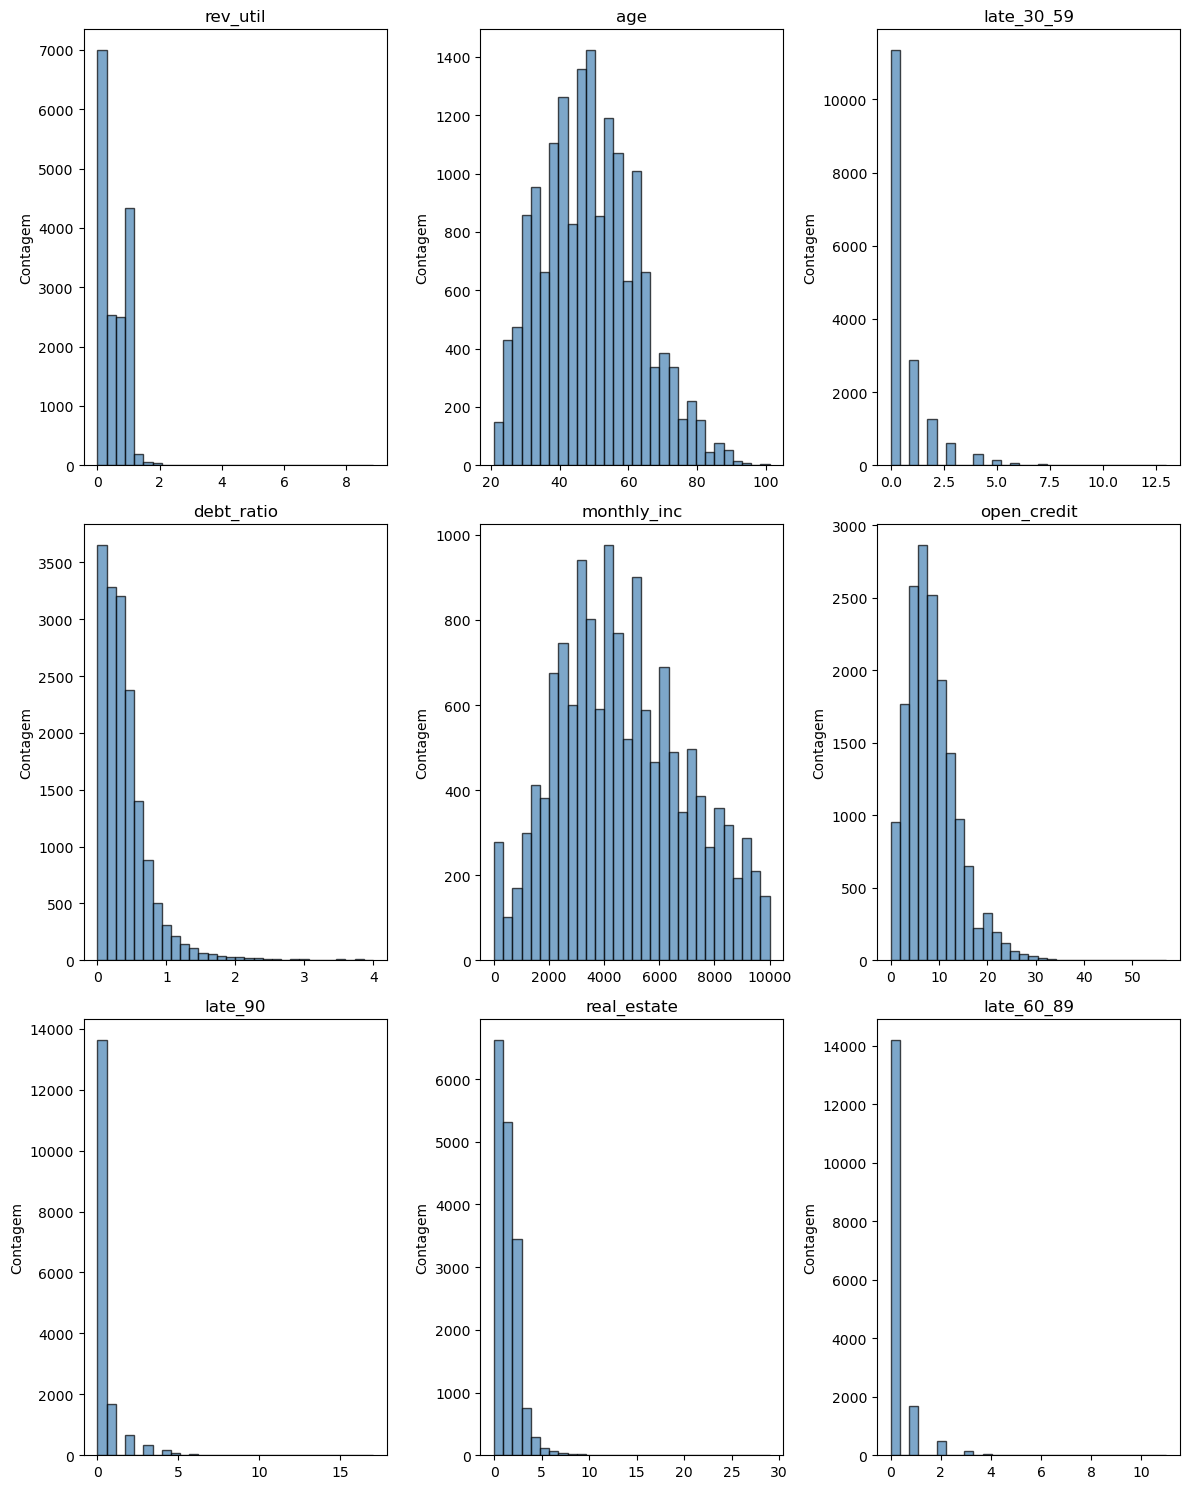

In [75]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))

nrows, ncols = 3, 3
for row in range(nrows):
    for col in range(ncols):
        i = row * ncols + col   # índice da feature
        if i < len(x.columns):
            feature = x.columns[i]
            
            ax[row, col].hist(
                no_outliers[feature],
                bins=30, alpha=0.7, color="steelblue", edgecolor="black"
                )
            
            ax[row, col].set_title(feature)
            ax[row, col].set_ylabel('Contagem')
        
        else:
            ax[row, col].axis("off")  # desliga subplot vazio

plt.tight_layout()
plt.show()


Foram tirados outliers para uma melhor visualização das distribuições.
Os histogramas mais importantes são os referentes aos períodos de atraso (late 60, late 30, late 90>)

# Checando outras correlações

Verificação de correlação de outras features, como atrasos e número de hipotecas, já que este último segue uma distribuição parecida com as anteriores

<Axes: xlabel='late_60_89', ylabel='late_90'>

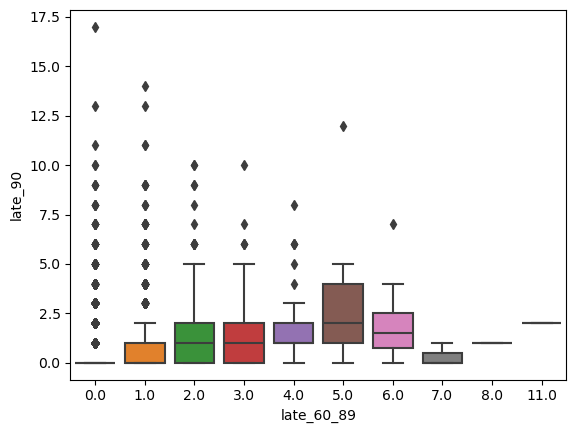

In [79]:
sns.boxplot(y='late_90', x='late_60_89', data=no_outliers)


# Tratamento de Dados

In [78]:
#Escalonamento padrão apenas dos dados contínuos
x_esc = ColumnTransformer(transformers = [('num', StandardScaler(), [0, 3, 4])], 
                                              remainder = 'passthrough').fit_transform(x)

In [3]:
#Escalonamento de todos os dados
x_esc_inteiros = ColumnTransformer(transformers = [('num', StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])], 
                                              remainder = 'passthrough').fit_transform(x)
#joblib.dump(x_esc_inteiros, 'x_esc_inteiros.pkl')

In [4]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_esc_inteiros, y, random_state = 1, test_size = 0.2)

# SVC

In [21]:
svm = SVC(C = 10)
svm.fit(x_treino, y_treino)
display(accuracy_score(y_teste, svm.predict(x_teste)))

0.7346694585701465

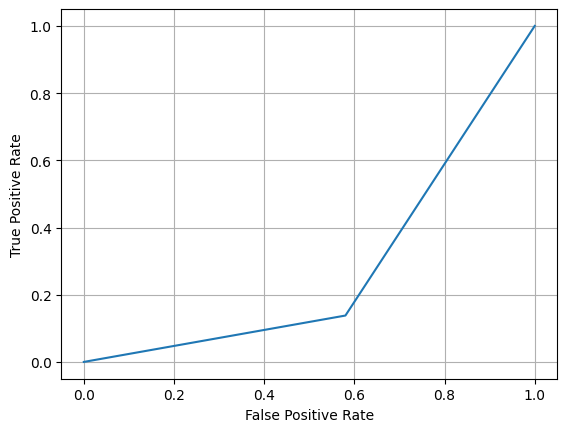

In [23]:
C = 1
svm = SVC(C = C)
svm.fit(x_treino, y_treino)
tpr, fpr, thresholds = roc_curve(y_teste, svm.predict(x_teste))
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
C = 1
svm = SVC(C = C)
svm.fit(x_treino, y_treino)
fpr, tpr, _ = roc_curve(y_teste, svm.predict(x_teste))
grafico = px.line(
x=fpr, y=tpr, 
title='Curva ROC', 
labels={'x': 'FPR', 'y': 'TPR'},
        )
modelo = 'SVM'
Kernel = 'poly'
n_estimators = 5
max_depth = 5
cor_grafico = "#41413c"
cor_fundo = "#323131"
cor_grade = 'white'
legenda = f"Modelo: {modelo} | Kernel: {Kernel} | C: {C} | n_estimators: {n_estimators} | max_depth: {max_depth}"
grafico.update_layout(
    annotations=[
                dict(
                text=legenda,
                xref="paper", yref="paper",
                x=0.01, y=1.05, showarrow=False,
                font=dict(size=15, family='Helvetica, sans-serif'),
                align="center"
                )
        ],  plot_bgcolor= cor_grafico,      # fundo do quadriculado
            paper_bgcolor= cor_fundo,
            title=dict(
                text="<b>Curva ROC</b>",
                font=dict(family="Helvetica", 
                          size=20, 
                          color="white")
            ),
            xaxis=dict(
                gridcolor= cor_grade,
                  title =  'Recall' # cor das linhas verticais
            ),
            yaxis=dict(
                gridcolor= cor_grade,  # cor das linhas horizontais
                title = 'Precisão'            
            
            ))

['salvo.pkl']

# Random Florest

In [103]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, 
                            max_samples = 100, bootstrap = True, n_jobs = 1)

In [104]:
bag_clf.fit(x_treino, y_treino)
y_pred = bag_clf.predict(x_teste)

In [105]:
accuracy_score(y_teste, y_pred)

0.7478312892611427